In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def SZ_ETF(stock):
    stock = stock.set_index('date')
    stock.index = pd.to_datetime(stock.index)
    stock = stock.sort_index(axis=0, ascending=True)
    stadate = '2012-06-01'
    enddate = '2018-06-08'
    stock = stock[pd.to_datetime(stock.index) >= pd.to_datetime(stadate)]
    stock = stock[pd.to_datetime(stock.index) <= pd.to_datetime(enddate)]
    stock['yesterday_close'] = stock['close'].shift(1)
    stock.loc[0:1,'yesterday_close'] = stock['open']
    stock['range'] = (stock['close']-stock['yesterday_close'])/stock['yesterday_close']
    stock['amplitude'] = (stock['high']-stock['low'])/stock['yesterday_close']
    return stock

In [3]:
# 上证综指
stock_sz = pd.read_csv('../ETF/data/999999.csv')
stock_sz = SZ_ETF(stock_sz)

# 300ETF(510300)
stock_300ETF = pd.read_csv('../ETF/data/510300.csv')
stock_300ETF = SZ_ETF(stock_300ETF)

In [4]:
# 设置收盘价序列：pd.Series()
corr_sz_c = pd.Series(stock_sz['close'])
corr_300ETF_c = pd.Series(stock_300ETF['close'])

In [5]:
x = np.array(corr_300ETF_c)
y = np.array(corr_sz_c)

In [6]:
x # 300ETF

array([ 2.362,  2.29 ,  2.293, ...,  3.839,  3.838,  3.787])

In [7]:
y # 上证综指

array([ 2373.44,  2308.55,  2311.92, ...,  3115.18,  3109.5 ,  3067.15])

In [8]:
Yahei = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\msyh.ttf')

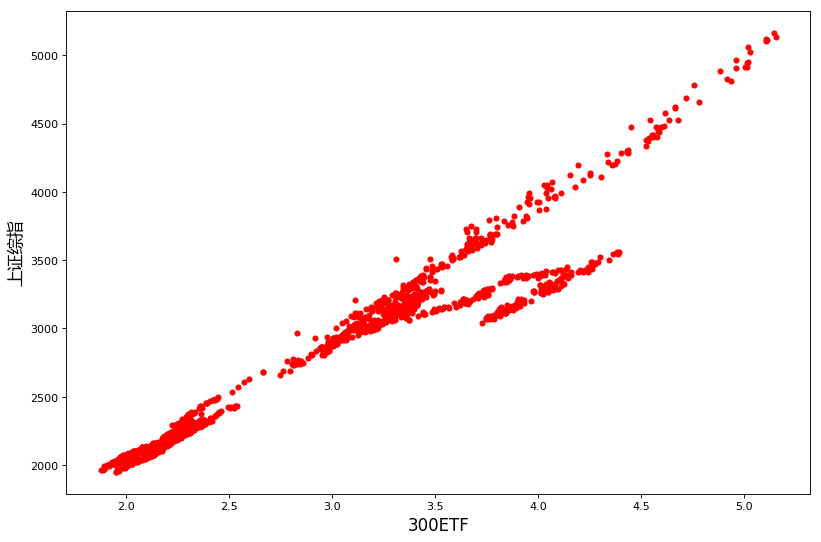

In [9]:
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(x, y, c="red", s=20)
plt.xlabel('300ETF', fontsize=15)
plt.ylabel(u'上证综指', fontproperties=Yahei, fontsize=15)
plt.show()

In [10]:
x0 = np.linspace(2.0, 5.0, 1000)

In [11]:
def get_model(deg):
    return lambda input_x=x0: np.polyval(np.polyfit(x, y, deg), input_x)

In [12]:
def get_cost(deg, input_x, input_y):
    return 0.5 * ((get_model(deg)(input_x) - input_y) ** 2).sum()

In [13]:
test_set = (1, 5, 10)
for d in test_set:
    # 输出相应的损失
    print(get_cost(d, x, y))

22072267.5918
14657645.3046
12416739.0375


In [14]:
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(x, y, c="LightPink", s=20)
for d in test_set:
    plt.plot(x0, get_model(d)(), label="degree = {}".format(d))

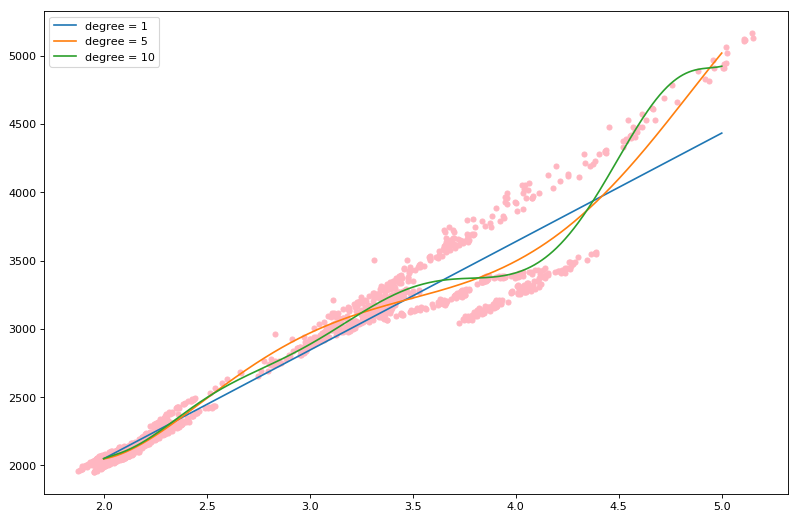

In [15]:
plt.legend()
plt.show()